# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_rows = 30
pd.options.display.max_columns = 20

# Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
df = pd.read_csv('/content/drive/MyDrive/Classroom/Data Science Project 4/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.shape

(10000, 14)

# #EDA (Exploratory Data Analyst)

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.describe(include=['object'])

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [21]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [ ]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

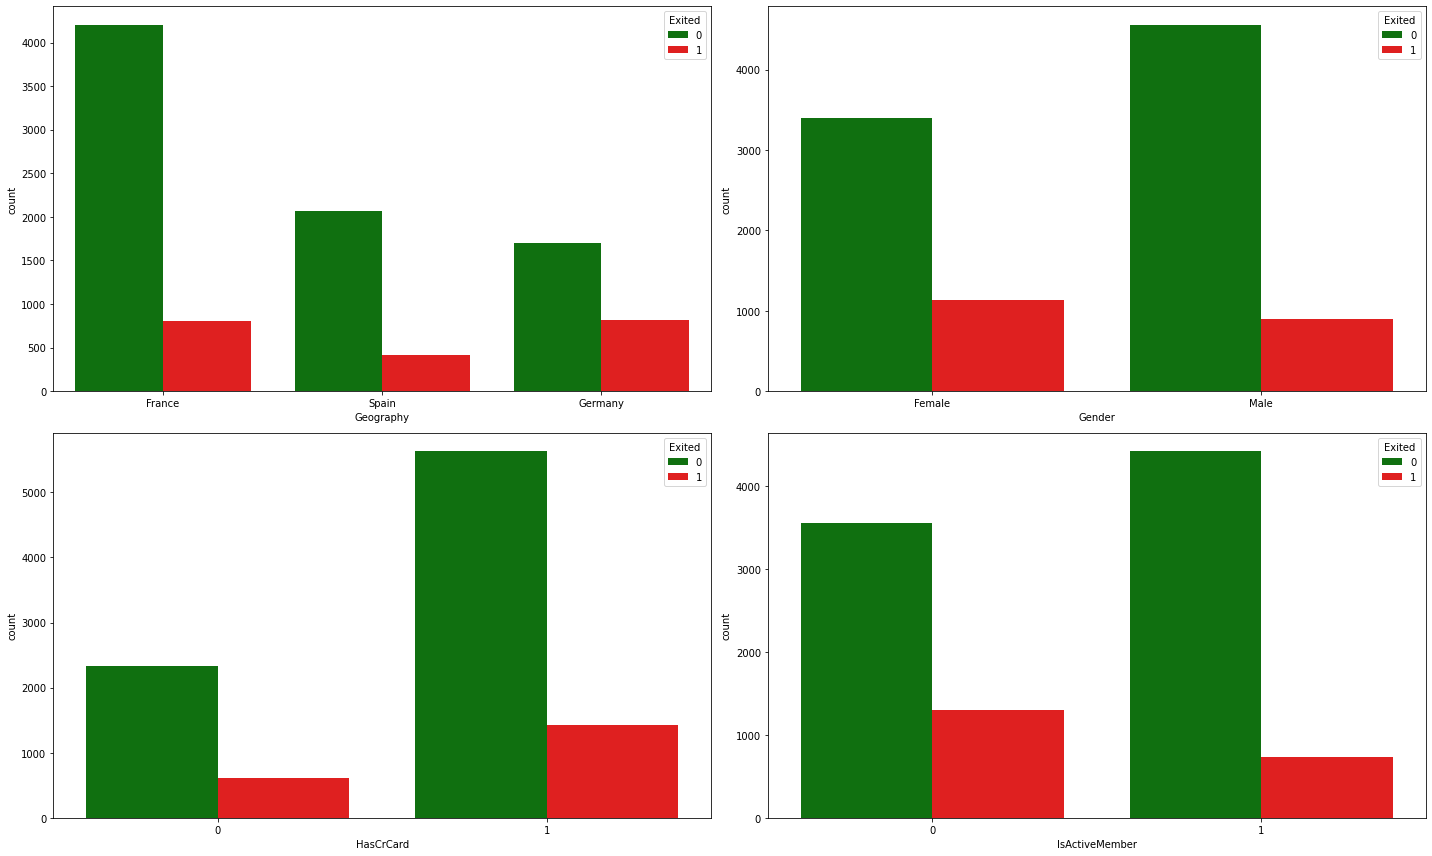

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(20, 12))
sns.countplot(data=df, x='Geography', hue='Exited',palette=['green',"red"], ax=ax[0][0])
sns.countplot(data=df, x='Gender', hue='Exited',palette=['green',"red"], ax=ax[0][1])
sns.countplot(data=df, x='HasCrCard', hue='Exited',palette=['green',"red"], ax=ax[1][0])
sns.countplot(data=df, x='IsActiveMember', hue='Exited',palette=['green',"red"], ax=ax[1][1])
plt.tight_layout();

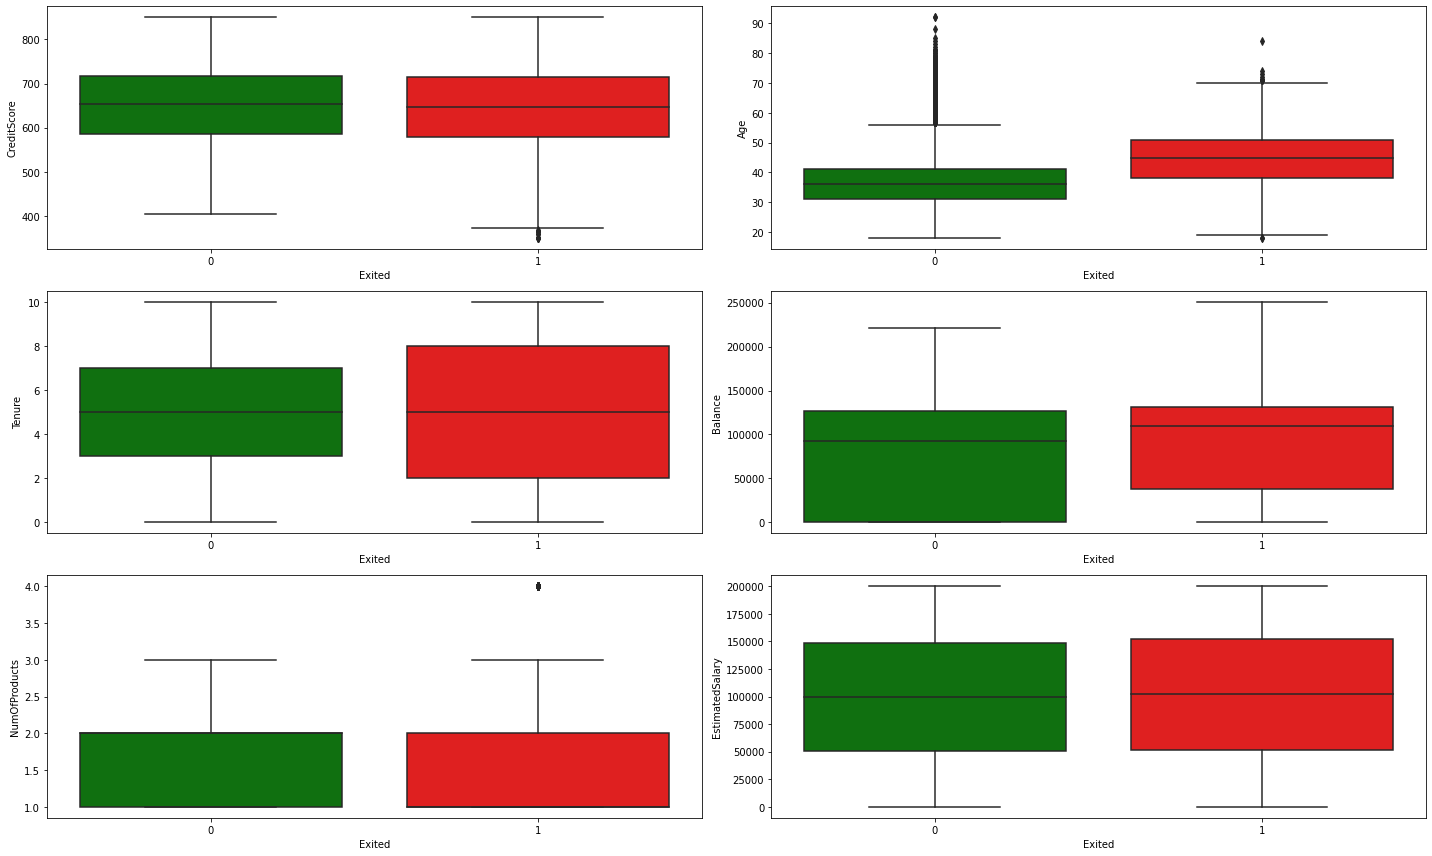

In [ ]:
fig, ax = plt.subplots(3,2, figsize=(20, 12))
sns.boxplot(data=df, y='CreditScore', x='Exited',palette=['green',"red"], ax=ax[0][0])
sns.boxplot(data=df, y='Age', x='Exited',palette=['green',"red"], ax=ax[0][1])
sns.boxplot(data=df, y='Tenure', x='Exited',palette=['green',"red"], ax=ax[1][0])
sns.boxplot(data=df, y='Balance', x='Exited',palette=['green',"red"], ax=ax[1][1])
sns.boxplot(data=df, y='NumOfProducts', x='Exited',palette=['green',"red"], ax=ax[2][0])
sns.boxplot(data=df, y='EstimatedSalary', x='Exited',palette=['green',"red"], ax=ax[2][1])
plt.tight_layout();

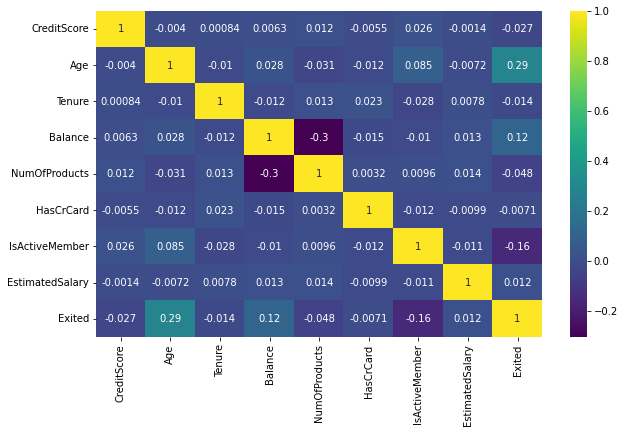

In [ ]:
cm = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True, cmap='viridis')

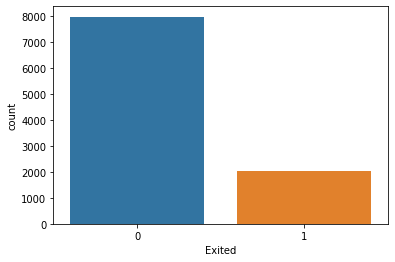

In [ ]:
sns.countplot(x='Exited', data=df)

Feature Engineering

In [22]:
df_fe = df.copy()

In [23]:
df_fe['BalanceSalaryRatio'] = df_fe['Balance']/df_fe['EstimatedSalary']

df_fe['TenureByAge'] = df_fe['Tenure']/(df_fe['Age'])

df_fe['CreditScoreGivenAge'] = df_fe['CreditScore']/(df_fe['Age'])

In [ ]:
df_fe.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,14.738095
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,14.829268
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,11.952381
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,17.923077
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,19.767442


#Data Preparation for model fitting

In [24]:
from sklearn.preprocessing import OneHotEncoder
lst = ['Geography', 'Gender']
ohe = OneHotEncoder()
ohe.fit(df_fe[lst])
df_ohe_res = pd.DataFrame(ohe.fit_transform(df_fe[lst]).toarray(),
                   columns=ohe.get_feature_names_out())
df_fe = pd.concat([df_fe, df_ohe_res], axis=1)
df_fe.drop(columns=lst, inplace=True)
df_fe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,14.738095,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,14.829268,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,11.952381,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,17.923077,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,19.767442,0.0,0.0,1.0,1.0,0.0


In [25]:
from sklearn.model_selection import train_test_split

X = df_fe.drop(columns=["Exited"]).copy()
y = df_fe['Exited'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=42)
print(len(X_train))
print(len(X_test))

7500
2500


# Model fitting and selection

1. Gradien Boosting Model
2. SVM
3. Decision Tree

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


## Fit Best Models

In [27]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [28]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
from sklearn.calibration import CalibratedClassifierCV

svc_clf = LinearSVC()
svc = CalibratedClassifierCV(svc_clf) 
svc.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=LinearSVC())

In [30]:
y_pred_gb = gb_clf.predict(X_test)
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2003
           1       0.76      0.48      0.59       497

    accuracy                           0.87      2500
   macro avg       0.82      0.72      0.75      2500
weighted avg       0.86      0.87      0.85      2500



In [31]:
y_pred_dt = dt_clf.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      2003
           1       0.47      0.48      0.48       497

    accuracy                           0.79      2500
   macro avg       0.67      0.67      0.67      2500
weighted avg       0.79      0.79      0.79      2500



In [32]:
y_pred_svm = svc.predict(X_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2003
           1       0.00      0.00      0.00       497

    accuracy                           0.80      2500
   macro avg       0.40      0.50      0.44      2500
weighted avg       0.64      0.80      0.71      2500



In [33]:
def get_auc_scores(y_actual, y_pred, y_proba):
    auc_score = roc_auc_score(y_actual, y_pred);
    fpr_df, tpr_df, _ = roc_curve(y_actual, y_proba);
    return (auc_score, fpr_df, tpr_df)

In [34]:
auc_gb, fpr_gb, tpr_gb = get_auc_scores(y,
                                        gb_clf.predict(X),
                                        gb_clf.predict_proba(X)[:,1])
auc_dt, fpr_dt, tpr_dt = get_auc_scores(y,
                                        dt_clf.predict(X),
                                        dt_clf.predict_proba(X)[:,1])
auc_svm, fpr_svm, tpr_svm = get_auc_scores(y,
                                        svc.predict(X),
                                        svc.predict_proba(X)[:,1])

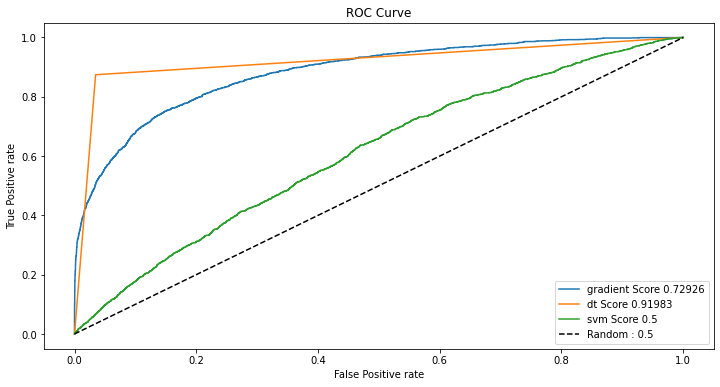

In [35]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_gb, tpr_gb, label = 'gradient Score ' + str(round(auc_gb, 5)))
plt.plot(fpr_dt, tpr_dt, label = 'dt Score ' + str(round(auc_dt, 5)))
plt.plot(fpr_svm, tpr_svm, label = 'svm Score ' + str(round(auc_svm, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random : 0.5')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Resampling to handle imbalanced dataset

In [36]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

In [37]:
y_train.value_counts()

0    5960
1    1540
Name: Exited, dtype: int64

In [38]:
y_smote.value_counts()

1    5960
0    5960
Name: Exited, dtype: int64

In [39]:
dt_smote = DecisionTreeClassifier()
dt_smote.fit(X_smote, y_smote)

DecisionTreeClassifier()

In [40]:
y_pred_smote = dt_smote.predict(X_test)
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      2003
           1       0.43      0.52      0.47       497

    accuracy                           0.77      2500
   macro avg       0.65      0.68      0.66      2500
weighted avg       0.79      0.77      0.78      2500



# Feature Importance

Text(0.5, 0, 'Decision Tree')

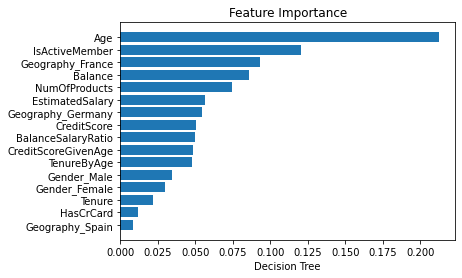

In [57]:
sorted_idx = dt_smote.feature_importances_.argsort()#[::-1]
col = X_smote.columns
plt.barh(col[sorted_idx], dt_smote.feature_importances_[sorted_idx])
plt.title('Feature Importance')
plt.xlabel("Decision Tree")

In [41]:
df.groupby('Exited')['Age'].mean()

Exited
0    37.408389
1    44.837997
Name: Age, dtype: float64

In [42]:
pd.crosstab(df['NumOfProducts'], df['Exited'])

Exited,0,1
NumOfProducts,,
1,3675,1409
2,4242,348
3,46,220
4,0,60
